<h1 align="center">AD_fbi: Automatic Differentiation Python Package</h1>

# Introduction

Our software package, *AD_fbi*, computes gradients using the technique of automatic differentiation. Automatic differentiation is important because it is able to solve the derivatives of complex functions at low cost while maintaining accuracy and stability. Its high practicality and precision make it applicable to a wide range of tasks, such as machine learning optimization, calculating financial loss or profit, and minimizing the cost of vaccine distribution. Automatic differentiation plays a crucial role in solving these problems. 

Prior to the technique of automatic differentiation, the two traditional computational techniques for solving differential equations are numerical differentiation and symbolic differentiation. The numerical differentiation method computes derivatives based on a finite numerical approximation which lacks stability and precision, and thus it is not ideal to be implemented in computer software. On the other hand, symbolic differentiation can become very computationally expensive as the function becomes more and more complex. 

The automatic differentiation technique transforms the entire computational process into a sequence of elementary arithmetic operations -- addition, subtraction, multiplication, division, and elementary functions. And then, it applies the chain rule on top of these elementary operations. In this way, it reduces the computational complexity that the model can reuse some of its parts computed in previous steps multiple times without re-calculating them. It keeps the same level of accuracy and precision as using symbolic differentiation. 

Our software package computes derivatives using the forward mode of auto differentiation. On top of that, it also implements different optimizers using leveraging auto differentiation, enabling users to find the minimum value of a function, location of the minimum value, and wall clock time to find these values.   


# Background
* __Chain Rule__

Chain Rule is the most important concept in automatic differentiation. To solve the derivatives of a composite function, we use the Chain Rule to decompose each variable in the function into elementary components and mulptily them together. 

For a given function $f(y(x))$, the derivative of $f$ with respect to $ x $ is the following:

$$
\begin{align}
\frac{\partial f}{\partial x} = \frac{\partial f}{\partial y} \frac{\partial y}{\partial x}\\
\end{align}
$$

Since $y$ is a n-dimensional vector, we introduce the gradient operator $ \nabla $ into the expression to calculate the derivative of $y$ with respect to $x$, where $x = (x_1, ..., x_n)$:

$$
\begin{align}
\nabla y(x) =
\begin{bmatrix}
{\frac {\partial y}{\partial x_{1}}}(x)
\\
\vdots 
\\
{\frac {\partial y}{\partial x_{n}}}(x)
\end{bmatrix}
\end{align}
$$

The above expression is for a single $y$, but we typically have multiple $y$ in a neural network. Thus, for a given function $f(y_1(x), ..., y_n(x))$, the derivative of $f$ with respect to $x$ is defined as the following:

$$
\begin{align}
\nabla f_x = \sum_{i=1}^n \frac{\partial f}{\partial y_i} \nabla y_i(x)\\
\end{align}
$$


* __Forward Mode automatic differentiation__

Here we will give an example of how to do forward mode automatic differentiation.

Given x = $\begin{bmatrix} {x_1} \\ \vdots \\ {x_m} \end{bmatrix}$, where $k \in (1, 2, ..., m)$, we introduce the intermediate operations $ v $ to compute values at each elementary operation step.

For example, to compute the gradient $\nabla f$  of the function $f(x) = log(x_1) + sin(x_1 + x_2)$, the expression is derived as the following:

$\nabla f = \begin{bmatrix} \frac {\partial f} {\partial x_1} \\ \frac {\partial f} {\partial x_2} \end{bmatrix}  = \begin{bmatrix} \frac {1} {x_1} + \cos(x_1 + x_2) \\ \cos(x_1 + x_2) \end{bmatrix}$

The computation graph is shown here: 

![alt text](graph.png "Computational Graph")

$D_p v_{-1} = \nabla v_{-1}^T p = (\frac {\partial v_{-1}} {\partial x_1} \nabla x_{1})^T p = (\nabla x_{1})^T p = p_1$

$D_p v_{0} = \nabla v_{0}^T p = (\frac {\partial v_{0}} {\partial x_2} \nabla x_{2})^T p = (\nabla x_{2})^T p = p_2$

$D_p v_{1} = \nabla v_{1}^T p = (\frac {\partial v_{1}} {\partial v_{-1}} \nabla v_{-1} + \frac {\partial v_{1}}{\partial v_{0}} \nabla v_{0})^T p = (\nabla v_{-1} + \nabla v_0)^T p = D_p v_{-1} + D_p v_0$

$D_p v_{2} = \nabla v_{2}^T p = (\frac {\partial v_{2}} {\partial v_{1}} \nabla v_1)^T p = \cos(v_1) (\nabla v_1)^T p = \cos(v_1) D_p v_1$

$D_p v_{3} = \nabla v_{3}^T p = (\frac {\partial v_{3}} {\partial v_{-1}} \nabla v_{-1})^T p = \frac {1} {v_{-1}} (\nabla v_{-1})^T p = \frac {1} {v_{-1}} D_p v_{-1}$

$D_p v_{4} = \nabla v_{4}^T p = (\frac {\partial v_{4}} {\partial v_3} \nabla v_{3} + \frac {\partial v_{4}}{\partial v_{2}} \nabla v_{2})^T p = (\nabla v_{3} + \nabla v_2)^T p = D_p v_{3} + D_p v_2$

Thus, the final generalized formula is the following:

$$ D_p v_j = (\nabla v_j)^T p = (\sum_{i < j} \frac{\partial{v_j}} {\partial{v_i}} \nabla v_i)^T p = \sum_{i < j} \frac{\partial{v_j}} {\partial{v_i}} (\nabla v_i)^T p = \sum_{i < j} \frac{\partial{v_j}} {\partial{v_i}} D_p v_i$$ 


* __Jacobian Matrix__

Having derived the above system of equations, we want to use the Jacobian matrix to compute these derivatives systematically.

The Jacobian matrix is defined as the following:

$$
J_{p}(x_{1},x_{2}, ..., x_{n}) = \left[ \begin{matrix}
\frac{\partial y_{1}}{\partial x_{1}} & ... & \frac{\partial y_{1}}{\partial x_{n}} \\
\vdots  & \ddots & \vdots  \\
\frac{\partial y_{m}}{\partial x_{1}} & ... & \frac{\partial y_{m}}{\partial x_{n}}
\end{matrix} \right] 
$$


For example, a 2 by 2 Jacobian matrix with 2 variables looks like the following:

$$
J_{p}(x_{1},x_{2}) = \left[ \begin{matrix}
\frac{\partial y_{1}}{\partial x_{1}} & \frac{\partial y_{1}}{\partial x_{2}} \\
\frac{\partial y_{2}}{\partial x_{1}} & \frac{\partial y_{2}}{\partial x_{2}}
\end{matrix} \right] 
$$

We compute $J_{p}$ in the forward mode in the evaluation trace.

* __Seed Vector__

Seed vector $p$ provides an efficient way to retrieve elements in a given direction from the Jacobian matrix. For example, if we want to retreive the $i$, $j$ element from the Jacobian matrix, the seed vector $p = [\overrightarrow{i}, \overrightarrow{j}]$ helps to retrieve the element of $\frac{df_{i}}{dx_{j}}$. 

We will introduce the seed vector in the forward trace to facilitate the retrieval of any element in the Jacobian matrix to make the calculation process more efficient and faster. The default value of the seed for a scalar input is 1. For an input variable of an array, the default seed vector is an array of all ones with the same length of the input variable. 

# Additional Feature - Optimizers

For the additional feature, we implemented three optimizers based on the forward mode automatic differentiation leverging the ForwardMode Class that we created. Optimizers are used for finding a local minimum of a differentiable function. Minimizing a function is a common problem in several areas. For example, in machine learning and deep learning, such as neural networks, we need to find the model parameters (or weights) with the minimized loss function. There are various different types of optimizer algorithms that can be used for finding mimina. One common category of optimizer are first-order iterative optimizers, which involve using the first-derivative (gradient) to choose what direction to move in the range of model weights. The general procedure of these first-order iterative optimizers involves firstly calculating the first-order derivative of the function, then moving toward the opposite direction of the derivative using a step size iteratively to find the minimum point. The three optimizers that we implements here are:

 * Gradient descent
 * Momentum
 * AdaGrad 
 
They are both first-order iterative optimizers. In the following, we will introduce their mathematical formulas, the pseudo code, and pros and cons.

* __Optimizer: Gradient Descent__




Gradient descent optimizer finds the minima by iteratively moving in the direction of steepest descent, which is the direction that will decrease the value of the function the most. This is done by calculating the gradient of the function, which is a vector of partial derivatives that indicates the rate of change of the function in all directions. The algorithm then moves in the opposite direction of the gradient, which is the direction of steepest descent, and repeats this process until it reaches the minimum value. The following is the mathematical formula for gradient descent algorithm: 

$$
x^{(t+1)} = x^{(t)}-\alpha \nabla f(x^{(t)})
$$
where $x$ can be either a scalar or a vector input,  $f(x)$ is a scalar function that we would like to find the minima, $x^{(t)}$ is the current position, $\alpha$ is the learning rate and \nabla f(x^{(t)}) is the derivative at the current position.

As is shown in the formula, you need to first define the function that you want to minimize. This function should be differentiable, which means that its partial derivatives with respect to all of its parameters exist and are continuous. Next, you need to initialize the starting position $x(0)$. These values can be randomly chosen, or you can set them to some specific values depending on your problem. Then, we need to calculate the gradient of the function with respect to each of the parameters given the current position. This is done by taking the partial derivative of the function with respect to each parameter using the forward mode of automatic differentiation. Once you have the gradient, you can update the values of the parameters by moving in the direction of steepest descent. This is done by subtracting the gradient from the current values of the parameters. The process of calculating the gradient and updating the parameters $x$ is repeated until some other stopping criteria is met.

Here is the pseudo-code gradient descent, where the stopping criterion is set to the number of iterations:

```python
# initialize the values of x and y
x = np.array([1, -1])
# define the function to minimize
fx = lambda x, y:x**3 + y**2
# define the learning rate
lr = 0.01
# define number of iterations
num_iter = 100

# repeat until stopping point is met
for t in range(1, num_iter + 1):
  # calculate the gradient of f with respect to x and y
  grad = fm.get_derivative()

  # update the values of x and y in the direction of steepest descent
  x = x - lr * grad_x
  

```
It is important to note that this simple example may not converge to the global minimum of the function. There are several challenges of gradient descent such as exploding gradients and oscillations. As is shown in the picture, exploding gradients can happen due to cliffs in the function. 


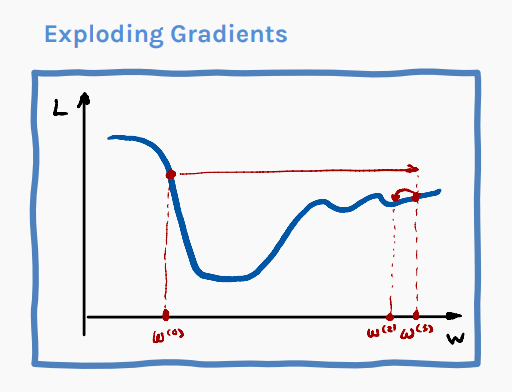

Simple Gradient Descent oscillates because updates do not exploit curvature information. 

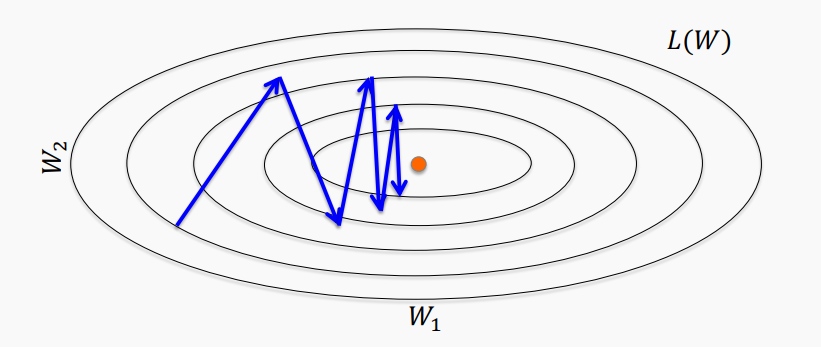



In practice, other more advanced techniques are preferable, such as using a momentum term or a learning rate schedule, to ensure that the algorithm converges accurately.

* __Optimizer: Momentum__

Momentum optimization is a technique used in training deep learning models to speed up the learning process by reducing the oscillation of the gradient descent optimization algorithm. The momentum technique updates each step by adding a fraction of the vector from its previous step, which helps the model to "memorize" its previous "momentum" to dynamically adjust step size, making convergence faster and more stably to reach the global minimum of the cost function. Compared to gradient descent optimization, momentum optimization is a more advanced technique.

$$
m^{(t)} = \beta m^{(t-1)} + (1-\beta) \nabla f(x^{(t)})\\
x^{(t+1)} = x^{(t)} - \alpha m^{(t)}
$$
where $m$ is the momentum of the previous step, $\beta$ is the decay rate of momentum, $\alpha$ is the learning rate.

To calcualte momentum, you need to begin by initializing 1)the learning rate, 2)momentum coefficient, 3)stopping criterion. Next, you calculate the gradient of the cost function with respect to the parameters, updates the velocity vector using the gradient, learning rate and momentum coefficient. This process is repeated until the model has met its stopping criterion.
Below is an example of the momentum optimizer:
```python
# define the learning rate
lr = 0.01
# define momentum coefficient
beta = 0.9
# define number of iterations
num_iter = 100

# repeat until the stopping criterion is met
for t in range(1, num_iter + 1):

	# calculate the gradient of f
	f_gradient = fm.get_derivative()
	
	# calculate momentum
	momentum = beta * momentum + (1 - beta) * f_gradient

	# update parameters
	velocity = lr * momentum
	curr_val = curr_val - velocity
```


* __Optimizer: AdaGrad__

Adagrad is a gradient-based optimization algorithm for training neural network models. It is a variant of stochastic gradient descent (SGD) that automatically adjusts the learning rate for each model parameter during training. The main idea behind Adagrad is to 
update learning rate based on observations from past steps. This can help the optimization process converge more quickly and effectively, especially for complex, large-scale machine learning models. Adagrad is well-suited for training deep learning models because it can make use of additional information about the structure of the data to improve the optimization process. 

$$
g_{(t,i)} = \frac{\partial }{\partial x_i^{(t)}} L(x^{(t)})\\
G_{t,ii} = \sum^t_{k=1} g_{k,i}^2\\
x_i^{(t+1)} = x_i^{(t)} - \frac{\eta}{\sqrt{G_{t,ii}+\epsilon}} g_{t,i}
$$

where g is the gradient in each dimension - i.e. large steps in flatter directions, careful steps in steep directions; G the cumulative sum of the square of the gradient in each dimension.

This pseudocode provides a high-level overview of how Adagrad works. The key ideas behind Adagrad are to accumulate gradients for each model parameter, and to update the model parameters based on the accumulated gradients and the learning rate.
```python
# define the learning rate
learning_rate = 0.1

# repeat until the stopping criterion is met
for t in range(1, num_iter + 1):

    # calculate the gradient of f
    f_gradient = fm.get_derivative()

	  # calculate adagrad based on gradient
    G = f_gradient**2
    variation = alpha / np.sqrt(G+epsilon) * f_gradient
    curr_val = curr_val - variation

  	# recalculate the function value and derivative at the updated value
	  f_gradient = fm.get_derivative()
    G = G + f_gradient**2


```




* __Visual Comparison of the Optimizers: using Howard Rosenbrock non-convex function__

We also created visualizations using our optimizers package to make a clear visual comparison of the three optimizers. For the visualiztion, we use the Rosenbrock function which is a non-convex function, introduced by Howard Rosenbrock. This function is used as a performance test for optimization algorithms. The code for plotting can be found in docs/plot.ipynb. You can also see the visualization from this [dynamic html page](https://bdrcrawdatafull.s3.amazonaws.com/figure.html) that we created. An screen shot of the dynamic plot is the following:

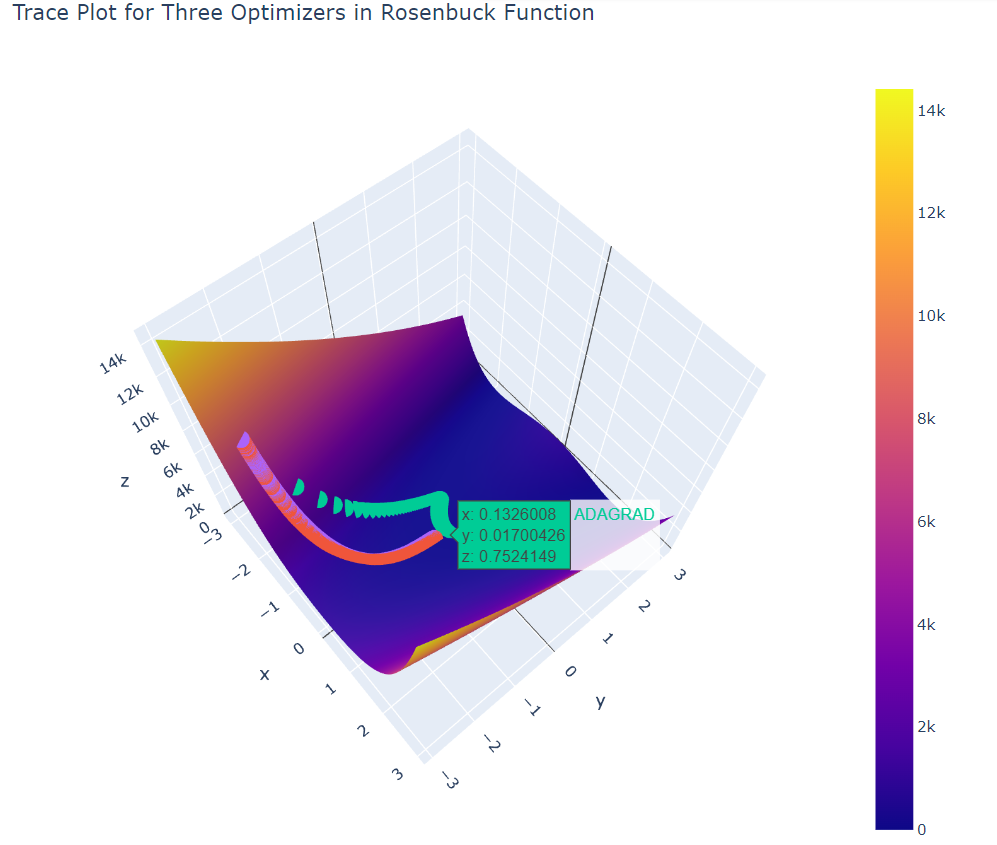


We also rendered an animation using Mathematica. You can see the corresponding animation from the following embedded YoutubeVideo. The initial point for three optimizers is the same. We use a learning rate of 0.0001 for momentum and gradient descent, but a much higher learning rate of 0.1 for AdaGrad, because AdaGrad converges slowly. We can see that momentum and gradient descent have very similar performance here and converge to the same point, but AdaGrad converges to a slightly different point. 


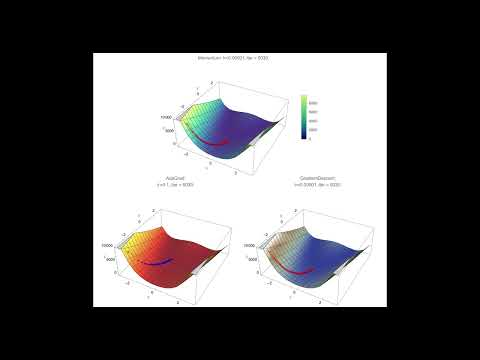

In [ ]:
#!pip install IPython
from IPython.lib.display import YouTubeVideo
YouTubeVideo('1dDZCC7QBrM')

# if you have display problem on the github page, 
# you can download the documentation and run the command to view,
# or, you can access the youtube video from the link:
# https://www.youtube.com/watch?v=1dDZCC7QBrM

*__Comparison of the Optimizers: using sin(x + y^2) function__

As another performance test, we also use the function $ sin(x+y^2)$, which has multiple deep valleys. We can see the point quickly falls into the valley for the three optimizer methods. The code for plotting can be found in docs/plot.ipynb. You can also see the visualization from [this dynamic html page](https://bdrcrawdatafull.s3.amazonaws.com/figure2.html) that we created. A screen shot of the dynamic plot is the following:
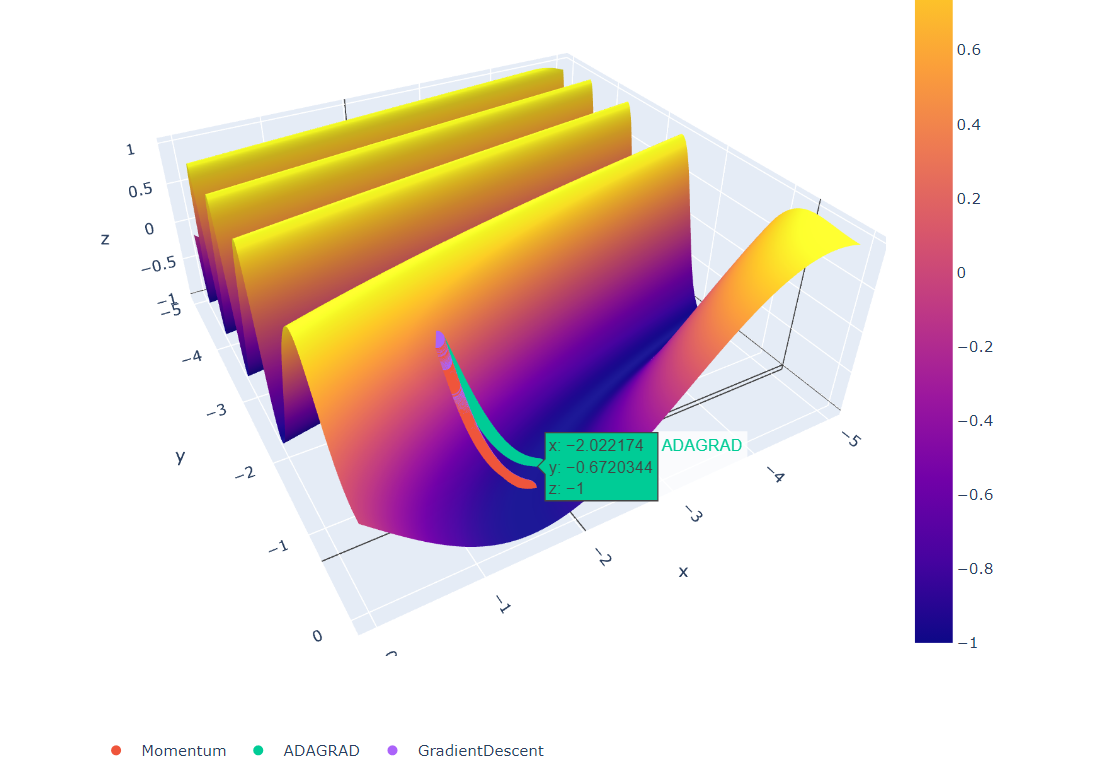

Again, for better visual comparison, we also rendered the annimation for this plot using Mathmatica. You can see the video from the following embedded YoutubeVideo.







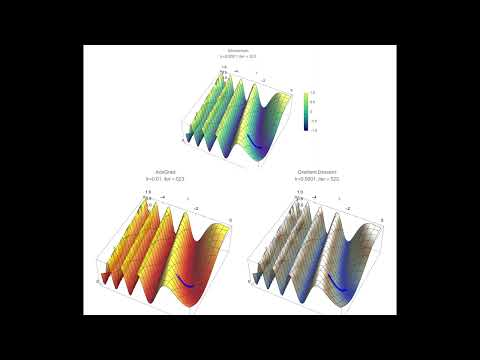

In [ ]:
#!pip install IPython
from IPython.lib.display import YouTubeVideo
YouTubeVideo('FZPQF6ooRLs')

# if you have display problem on the github page, 
# you can download the documentation and run the command to view,
# or, you can access the youtube video from the link:
# https://www.youtube.com/watch?v=FZPQF6ooRLs

From the plot, we can see that the performances of momentum and gradient descent is similar. But AdaGrad creates a slightly different trajectory than momentum and gradient descent due to its adaptive learning rate. 




# How to use *AD_fbi*

0. __Installing the package:__

   * clone our github repository with the following line:
    
    <code>git clone https://code.harvard.edu/CS107/team06.git</code>

   * cd to team06 directory:
    
    <code>cd {YOUR_LOCAL_DIRECTORY}/team06</code>

   * create a virtual environment:

    <code>python3 -m venv tests</code>

   * activate the tests virtual environment:

    <code>source tests/bin/activate</code>

   * install dependencies from requirement.txt (downloaded from our GitHub repository): 

    <code>python3 -m pip install -r requirement.txt</code> 

   * install our package: 
    
    <code>python3 -m pip install -i https://test.pypi.org/simple/ AD-fbi==0.0.6</code>

   * cd to source directory: 

    <code>cd src/</code>

   * open python console:
  
    <code>python3</code>


2. __Importing the package:__

   * import our package using python console:
    
    ```python
    from AD_fbi.forward_mode import ForwardMode
    ```
    
3. __Instantiating AD objects:__

   * Input: 
    - <code>func</code>: function $f(x)$ 
    - <code>x</code>: a single value or an array to be calculated with respect to $f(x)$ <code>func</code>
    - <code>seed</code>: seed vector
    
3.1. Instantiate an AD object for a scalar function of a single input ($R$ -> $R$):

  
**Example:**
   * For $R$ -> $R$
   ```python
    func = lambda x: x + 1
    x, seed = 1, -1
    # instantiate an AD object
    fm = ForwardMode(x, func, seed)

    # To calculate function value and dual value with respect to func
    print(fm.calculate_dual_number())
    # To calculate f(x)
    print(fm.get_fx_value())
    # To calculate derivative with respect to f(x)
    print(fm.get_derivative())
  ```
  Output: 

      (2.0, -1.0)
      2.0
      -1.0

3.2. Instantiate an AD object for a vector function with multiple input variables ($R^m$ -> $R^n$): 
**Example:**
   * For $R^m$ -> $R^n$
   ```python
    import numpy as np
    func = lambda x, y: 2*x + y
    x, seed = np.array([1, 1]), [2, -1]
    # instantiate an AD object
    fm = ForwardMode(x, func, seed)

    # To calculate f(x)
    print(fm.get_fx_value())
   ```
  Output:

       3

3.3. Instantiate an AD object for a vector function with multiple input variables ($R^m$ -> $R$):
   * For $R^m$ -> $R$
   ```python
    func = lambda x, y: (2*x + y, 3*y + x**2)
    x, seed = np.array([1, 1]), [2, -1]
    # instantiate an AD object
    fm = ForwardMode(x, func, seed)

    # To calculate f(x)
    print(fm.get_fx_value())
   ```
   Output:

       array([3., 4.])

3.4. Instantiate an AD object for a vector function with multiple input variables ($R$ -> $R^n$):
   * For $R$ -> $R^n$
   ```python
    func = lambda x: (x + 1, x**3)
    x, seed = 1, -1
    # instantiate an AD object
    fm = ForwardMode(x, func, seed)

    # To calculate f(x)
    print(fm.get_fx_value())
   ```
   Output:

       array([2., 1.])

3.4. __Optimizer:__
   Our optimizer moudule includes three different optimizers: 
   1. Gradient Descent
   2. Momentum
   3. AdaGrad (Adaptive Gradient)

**Quick Start Example:**
   * For a quick overview
   ```python
    from AD_fbi import optimizers
    import numpy as np

    # define the function to find the minima points
    fx = lambda x, y:x**3 + y**2
    # define x
    x = np.array([1, -1])
    # define number of iterations
    num_iter = 100
    # define learning rate (default = 0.01)
    alpha = 0.01
    # define exponential decay rate (default = 0.9)
    beta = 0.9

    # find the mimina points and the running times for each optimizer
    # the optimizer methods will return the running time, the minimum values of the function (minima), and the locations to get the minima
    time_gd, min_gd, x_vals_gd = optimizers.Optimizer.gradient_descent(x, fx, num_iter, alpha)
    time_mom, min_mom, x_vals_mom = optimizers.Optimizer.momentum(x, fx, num_iter, alpha, beta)
    time_ada, min_ada, x_vals_ada = optimizers.Optimizer.ADAGRAD(x, fx, num_iter,alpha)

    print(time_gd, min_gd, x_vals_gd)
    print(time_mom, min_mom, x_vals_mom)
    print(time_ada, min_ada, x_vals_ada)
   ```

   * __3.4.1 Gradient Descent Optimizer Input:__
    - <code>func</code>: function $f(x)$ 
    - <code>x</code>: the variable input (can be in either scalar or vector form)
    - <code>num_iter</code>: the number of interations to perform
    - <code>alpha</code>: learning rate for the gradiant descent (default = 0.01)
  
**Example:**
   * For a scalar input
   ```python
    from AD_fbi import optimizers
    fx = lambda x: (-1 * x.log()) + (x.exp() * x**4) / 10
    x = 1
    num_iter = 1000
    optimizers.Optimizer.gradient_descent(x, fx, num_iter)
   ```
   Output:
   ```
   (0.09954595565795898, 0.2617300604953795, 0.9424960556340723)
   ```
   
   * For a scalar function with a vector of inputs
   ```python
    fx = lambda x, y:x**3 + y**2
    x = np.array([1, -1])
    num_iter = 1000
    optimizers.Optimizer.gradient_descent(x, fx, num_iter)
   ```
   Output:
   ```
   (0.06302499771118164, 0.03381871354483734, array([ 0.24973993, -0.13506452]))
   ```

   * To change your learning rate, alpha
   ```python
   optimizers.Optimizer.gradient_descent(x, fx, num_iter, alpha=0.02)
   ```
   Output:
   ```
   (0.07634305953979492, 4.3521958694880915e-06, array([ 1.63268653e-02, -1.86738145e-18]))
   ```

   * __3.4.2 Momentum Optimizer Input:__
    - <code>func</code>: function $f(x)$ 
    - <code>x</code>: the variable input (can be in either scalar or vector form)
    - <code>num_iter</code>: the number of interations to perform
    - <code>alpha</code>: learning rate for the gradiant descent (default = 0.01)
    - <code>beta</code>: exponential decay (default = 0.9)

**Example:**
   * For a scalar input
   ```python
   from AD_fbi import optimizers
   import numpy as np   
   fx = lambda x: (-1 * x.log()) + (x.exp() * x**4) / 10
   x = 1
   num_iter = 1000
   optimizers.Optimizer.momentum(x, fx, 1000)
   ```
   Output:
   ```
   (0.09925079345703125, 0.26172998379097046, 0.9423331580331616)
   ```
   
   * For a scalar function with a vector of inputs
   ```python
   fx = lambda x, y:x**3 + y**2
   x = np.array([1, -1])
   num_iter = 1000
   optimizers.Optimizer.momentum(x, fx, num_iter)
   ```
   Output:
   ```
   (0.07795214653015137, 2.7605629377339922e-05, array([ 3.02226506e-02, -3.30135704e-12]))
   ```
   * To change your learning rate, alpha
   ```python
   optimizers.Optimizer.momentum(x, fx, num_iter, alpha=0.02)
   ```
   Output:
   ```
   (0.07883596420288086, 3.0847282231927507e-06, array([ 1.45570141e-02, -1.72716509e-23]))
   ```

   * __3.4.3 Adagrad Optimizer Input:__ 
    - <code>x</code>: The variable input (can be in either scalar or vector form)
    - <code>fx</code>: Function $f(x)$
    - <code>num_iter</code>: Number of interations to perform (defualt 10000)
    - <code>alpha</code>: Learning rate for the gradiant descent (default 0.01)
    - <code>epsilon</code>: Denominator value to assure that ZeroDivisionError is not raised (default 1e-8)
     - <code>verbose</code>: Boolean to whether return the full trace of result at each step. Default to False.
   
**Example:**
   * For a scalar input
   ```python
   from AD_fbi import optimizers
   import numpy as np   
   fx = lambda x: (-1 * x.log()) + (x.exp() * x**4) / 10
   x = 1
   optimizers.Optimizer.ADAGRAD(x, fx)
   ```
   Output:
   ```
   (0.8488328456878662, 0.2617299837909705, 0.9423331580331631)
   ```
   
   * For a scalar function with a vector of inputs
   ```python
   fx = lambda x, y:x**3 + y**2
   x = np.array([1, -1])
   optimizers.Optimizer.ADAGRAD(x, fx)
   ```
   Output:
   ```
   (0.6361660957336426, 0.0028065394460947365, array([ 0.13835317, -0.01257929]))
   ```
   * To change your learning rate, alpha
   ```python
   fx = lambda x, y: (1 - x)**2 + 100*(y - x**2)**2
   num_iter = 10000
   alpha = 0.2
   optimizers.Optimizer.ADAGRAD(np.array([1,2]), fx, num_iter, alpha)
   ```
   Output:
   ```
   (1.1701529026031494, 0.0004431195291550218, array([1.02103907, 1.04258986]))
   ```
   * Note that input function should always be a scaler function, no matter with one variable or a vector of variables.
   


# Software Organization

__Folder structure__

The folder structure for the *AD_fbi* package:

```
Team06/
├── LICENSE
├── README.md
├── dist
│   ├── ad_fbi-0.0.4-py3-none-any.whl
│   └── ad_fbi-0.0.4.tar.gz
├── docs
│   ├── figure.html
│   ├── figure2.html
│   ├── documentation.ipynb
│   ├── graph.png
│   ├── milestone1.ipynb
│   ├── milestone2.ipynb
│   ├── milestone2_progress.md
│   └── plot.ipynb
├── pyproject.toml
├── requirement.txt
└── src
    ├── AD_fbi
    │   ├── __init__.py
    │   ├── dual_number.py
    │   ├── forward_mode.py
    │   └── optimizers.py
    └── tests
        ├── __init__.py
        ├── test_dual_number.py
        ├── test_forward_mode.py
        └── test_optimizers.py



``` 

__Modules & Functionalities__

The AD_fbi package contains three essential modules: 1) a dual number module for elementary operations, 2) forward mode automatic differentiation, and 3) an optimizers extension module. The followings are the decriptions of their functionalities:

   * dual_number.py: This module implements the DualNumber class, which contains methods to compute the function and derivative values of the elementary operations, and to overload the elementary operations for a dual number. These functions are essential to computing the primal and tangent trace in the forward mode of AD. Examples of elementary operations include: <code>+</code>, <code>-</code>, <code>\*</code>, <code>/</code>, <code>sin()</code>, <code>cos()</code>.
    
   * forward_mode.py: This module implements a ForwardModel class that provides a method to intialize a forward mode AD object, a method to construct a computational graph dictionary, and a method to run the forward mode process and returns the computed derivative of the function at the evaluated point.

   * optimizers.py: This module implements three optimizers of 1) Gradient Descent, 2) Momentum and 3) Adagrad to facilitate the basic automatic differentiation functionalities. The package provides three different optimizers to allow users to compare the speed, efficiency, and stability of convergence. 

__Test Suite__

The test suite lives in the <code>team06/src/tests/</code> directory. It contains all pytests for our package. The YAML file under the <code>team06/.github/workflows/</code> directory defines the CI setup and jobs for GitHub Actions. When a new code is pushed to main branch, all tests are automatically trigered to test the code. 

__Package Distribution__

The package is distributed via PyPI. We first add a _pyproject.toml_ file to our project, then install `build` (a PEP517 package builder). After that, we build our package release and finally upload it to PyPI. We also add the pyproject.toml file to set up the backend of our package development.

Users can install the package using the following command line:
```
python3 -m pip install AD_fbi
```
Install dependencies using the following command line:
```
python3 -m pip install -r requirements.txt
```
NOTE: Our package has not uploaded to PyPI at this point. You can clone our github repository and follow the instruction under the **How to use AD_fbi** section. 

__Package Dependencies__

We rely on the following external dependencies in our package:
* numpy>=1.22.0
* pytest==7.1.2
* pytest_cov==4.0.0


# Implementation
    
* __Main Classes__
  * <code>DualNumbers</code>: class for operations with a dual number.
  * <code>ForwardMode</code>: class for forward mode differentiation.
  * <code>Optimizers</code>: class for three different optimizers - Gradient Descent, Momentum,Adagradient. This object has no attributes, but each method within the
   class requires a <code>x</code> input, a function <code>func</code> input, and the number of iterations <code>num_iter</code> for the specific optimizing method. Additionally, each method
   has their own optional hyperparameters which the user can input if they choose not to use our standard default values.

* __Core Data Structures & Dual Numbers__
  * Our primary core data structure is a numpy array, which we use to store both the variable list and the function list. Then using the
   methods within the `ForwardMode` class, we compute the jacobian and function value. We store the corresponding values or arrays in a tuple. For a single input, the jacobian and function value are singular values, and for multi-dimensional vector input, the stored values are arrays.


* __Classes Method & Name Attributes__
  * <code>DualNumbers</code>: 
    * A `__init__` method to initialize a <code>DualNumbers</code> object with a real number value and a dual number value.
    * A `__repr__` method to return the object representation in string format.
    * Multiple methods to overload the elementary operations for a dual number. e.g. `__add__`, `__sub__`, `__mul__`, `__div__`, `__pow__`, `__radd__`, `__rsub__`, `__rmul__`, `__rdiv__`, `__rpow__`, etc.
    * Multiple methods to compare dual numbers. e.g. `__ne__`, `__eq__`, etc.
    * Multiple methods to transform a dual number. e.g. `sqrt`, `log`, `sin`, `cos`, `exp`, `tan`, etc.

  * <code>ForwardMode</code>:
    * A `__init__` method  to initialize a `ForwardMode` Object with an input value `x`, a function `func`, and a seed vector `seed`.
    * A `get_fx_value` method to run the forward mode process and return a function value at the evaluated point `x`.
    * A `calculate_dual_number` method to run the forward mode process and return the evaluated value and the derivative of the input function at the evaluated point `x`.
    * A `get_derivative` method to run the forward mode process and return a value of directional derivative corresponding to a specific seed vector.

  * <code>Optimizer</code>:
    * A `gradient_descent` method implements the Gradient Descent optimizer that takes in the inputs of `x`, `func` and `num_iter`. Users can change the learning rate `alpha` by specifying custom learning rate.
    * A `momentum` method implements the momentum optimizer that takes in the inputs of `x`, `func` and `num_iter`. Users can change the learning rate and momentum coefficient `alpha` and `beta` by specifying their custom values.
    * A `ADAGRAD` method implements the Adaptive gradient optimizer that takes in the inputs of `x`, `func`, and `num_iter`. Users can change the learning rate and a small denominator number `alpha` and `epsilon` by specifying their custom values.

  
* __Dealing With Operator Overloading and Elementary Functions__

   * For the overloading operator template (like `__add__` for our special dual number class object), we implemented multiple methods such as `__radd__`, `__rsub__`, `__rmul__`, etc. to handle both cases of dual number + integer, and integer + dual number. The `__r*__` methods are necessary to handle overloading. 

   *  As listed above, within the <code>DualNumbers</code> class we’ve overloaded the simple arithmetic functions (addition, subtraction, multiplication,
   division, negation, power, equal, and not equal) to calculate both the value and the dual number. We’ve also defined our own
   elementary functions, such as `sin` and `sqrt` etc. to compute the value and the derivative. This module
   generalizes each of the functions in order for the <code>ForwardMode</code> class to handle both scalar and vector inputs. Each method has also implemented raise error attribute to deal with all possible types of invalid inputs. The output is a tuple of the function value and the derivative, which
   is used in the <code>ForwardMode</code> class.
   
* __Dealing With Operator Overloading on Reverse Mode__

   * We currently are not interested in implementing a reverse mode on our package.

* __Dealing With MultiDimensional Input and Output Function__

   * Use `try` and `except` to handle multi-dimensional and single-dimensional case separetly. For the multi-dimensional case, we design a helper function to loop through all of the functions' inputs and reassign the value/derivative as a vector. 
   * We treat functions as a list (so high dimensional functions will be a list of functions)
   * The `grad()` function (or jacobian function) is generic to both single-dimensional and multi-dimensional(as they are either a list of 1 or a list of mulitple functions).
   
* __External Dependencies__
   * We use the numpy library to create our data structure for the computational graph and perform
   computations outside of those we created in our dual_number class.

# License

Our *AD_fbi* package is licensed under the GNU General Public License v3.0. This free software license allows users to do just about anything they want with our project, except distribute closed source versions. This means that any improved versions of our package that individuals seek to release must also be free software. We find it essential to allow users to help each other share their bug fixes and improvements with other users. Our hope is that users of this package continually find ways to improve it and share these improvements within the broader scientific community that uses automatic differentation.

# Broader Impact and Inclusivity Statement

The AD_fbi an easy-to-use open-source python package aims at advancing the process of training complex neural network models. It provides various moudules, methods and optimizers to accurately and efficiently computing the derivatives of a function. The advantage of using our package to compute gradients of a function is that the automatic differentiation method implemented in this package maintains machine precision. One potential negative impact of the package is that it can make it easier for researchers to develop complex models that are difficult to interpret, debug or understand. This can make it harder for other researchers to reproduce or verify the results of a study, which can undermine the credibility of the research. Another potential program of using these optimizers is that the learning rate can be hard to tune to get the minimum, resulting in bias in the prediction process.

As the maintainers of AD_fbi, we are committed to creating a diverse and inclusive community. We believe that diversity is essential to the success of our project and to the broader field of AI and machine learning. To support this commitment:
- We welcome contributors from all groups and strive to create an environment that is inclusive and supportive of all members of our community. 
- We use inclusive language in our documentation and communication, and we strive to avoid language that is offensive or exclusionary.
- We welcome and encourage feedback from the community on ways that we can improve our diversity, equity, and inclusion efforts. 
- We work to eliminate discrimination and bias in all aspects of our work, including our code review process and our decision-making. 

We recognize that diversity, equity, and inclusion are ongoing efforts, and we are committed to continually improving in these areas.

# Future Work and Extensions
We have proposed several different future direction:


1.   We can extend reverse mode automatic differentiation by constructing an additional intermediate computational graph, which is widely used in the field of deep learning. In particular, the reverse mode method can be efficient in dealing with cases where the number of input is much larger than the number output. 
2.   We can apply our optimizers to real world problems. For example, suppose we design a CNN model using the MNIST image dataset, we can customize our gradient descent optimizer module by allowing batch data inputs.
3.   Future contributors can add more advanced optimizers to our package, such as adam, or any novel experimental optimizers.
4.   In terms of performance testing, we can benchmark the running time for our library and compare it with other existing libraries. We can try other type of data structures (like dictionary) to store the variables and functions in forward mode which might potentially boost our performance. 
